# Notebook 3 Implementacion Teoria RL Reto: Interlub
Author: A. Ramirez-Morales (andres.ramirez@tec.mx)


## Instrucciones:
- Active su entorno de `conda`
- Este Notebook es muy similar al de la actividad 5 del modulo 2
- La idea de este Notebook es que usted ponga en el contexto teorico la solucion del reto Interlub
- El codigo de abajo es la solucion del Notebook 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, chi2, t, kstest, shapiro, f

## 1. Formulación matricial de RLM

Nuestro modelo es

$$y_i=\beta_0+\beta_1x_{i,1}+...+\beta_kx_{i,k}+\epsilon_i$$


Ejercicios:

- Anteriormente, se generaron datos 100% de juguete, el objetivo es adaptar este Notebook para los datos del reto Interlub
- Incluya los datos que genero en las etapas anteriores
- Modifique las lineas de codigo para aumentar el numero de variables explicativas
- Sugerencia: despues de su investigacion de cuales variables son mas importantes en la industria de grasas, enfoquese en alrededor de 5
variables
- Complete las siguientes lineas de codigo siga las instrucciones en los comentarios

In [2]:
# aqui se empieza el 

# incluya sus datos y sustituya/complete las siguientes lineas
# Cargamos los datos, solo los númericos
df = pd.read_csv("/Users/damian/Universidad/multivariados_ds/reto_andres/data/transformed_data_interlub.csv")

n = df.shape[0]  # numero de observaciones
k = 5  # numero de variables explicativas
p = k + 1 # numero de parametros a estimar (incluye intercepto)

# valores verdaderos, como modificaria su logica para adptarlo a interlub?
beta_0 = 200.0   # intercepto base (ejemplo)
beta_1 = 30.0    # efecto del NLGI
beta_2 = 0.10    # efecto de la viscosidad
beta_3 = 0.50    # efecto del punto de gota
beta_4 = -2.0    # efecto de la estabilidad mecánica
beta_5 = 0.0003  # efecto del factor de velocidad

true_beta = np.array([beta_0, beta_1, beta_2, beta_3, beta_4, beta_5])

X1 = df["Grado NLGI Consistencia"].values
X2 = df["Viscosidad del Aceite Base a 40°C. cSt"].values
X3 = df["Punto de Gota, °C"].values
X4 = df["Estabilidad Mecánica, %"].values
X5 = df["Factor de Velocidad"].values

# hacer la matriz X, Para el reto extender esta matriz a cuando menos 5 variables explicativas
X_final = np.column_stack([np.ones(n), X1, X2, X3, X4, X5])

## 2.  Errores

Ejercicios:
- Las lineas de abajo tienen una propuesta poco realista de los errores del model RLM 
- Proponga errores mas realistas para en acorde a grasas encontradas en distintas manufacturas
- Analice el modelo propuesto
- Ejecute las lineas modificadas/aumentadas de codigo

In [4]:
# aqui elija errores 
# Modificamos la desviacion estandar de los errores, para que tenga sentido con los datos de interlub
sigma = 50.0
epsilon = np.random.normal(loc=0, scale=sigma, size=n)

# RLM matricial
y = X_final @ true_beta + epsilon
print(y)


[608.48097265 556.65676711 463.76702994 450.45038178 482.93862206
 378.20519097 980.43929422 422.88599595 588.098533   518.15111355
 601.3805879  630.13784237 397.76215625 497.44129986 704.53460503
 389.95733874 582.58018657 238.81314112 407.47704733 531.88274569
 573.60815144 502.35794117 539.09472391 696.49047255 554.02198429
 534.70478751 748.60684856 700.54055205 537.56911786 444.85763105
 572.77959478 516.20770091 418.87366177 493.61011995 383.19981454
 506.65554006 434.77502515 477.70494051 576.86732105 529.51377194
 604.85683164 595.42501384 582.31603498 307.04054014 389.00203827
 320.95973878 771.13028096 666.31621546 674.5934941  588.73747959
 654.59544845]


## 3. Propiedades de la matriz sombrero $\hat{H}$

Ejercicios:
- Analice si la nueva matriz sombrero cumple con las propiedades utiles
- En caso de no cumplir con las propiedades, investigue el motivo y subsane para que lo sea

In [5]:
# construya la matriz X^T X
X_transpose_X = X_final.T @ X_final
print(f"\nX'X matrix ({p} × {p}):")
print(X_transpose_X)

# primero verificar si X^T X es invertible con el rango
rank = np.linalg.matrix_rank(X_transpose_X)
print(f"\nRango of X'X: {rank}/{p}")
print(f"X'X es invertible: {rank == p}")


X'X matrix (6 × 6):
[[ 5.10000000e+01  7.77000000e+01  2.88810000e+04  1.22760000e+04
  -4.85130000e+02  1.64485150e+07]
 [ 7.77000000e+01  1.53190000e+02  3.72320000e+04  1.87055000e+04
  -7.04160000e+02  2.61728517e+07]
 [ 2.88810000e+04  3.72320000e+04  4.32174010e+07  7.39049500e+06
  -4.30083400e+05  4.58182538e+09]
 [ 1.22760000e+04  1.87055000e+04  7.39049500e+06  3.54189200e+06
  -8.92962000e+03  3.38583984e+09]
 [-4.85130000e+02 -7.04160000e+02 -4.30083400e+05 -8.92962000e+03
   6.99471249e+04 -2.58798230e+08]
 [ 1.64485150e+07  2.61728517e+07  4.58182538e+09  3.38583984e+09
  -2.58798230e+08  1.02175001e+13]]

Rango of X'X: 6/6
X'X es invertible: True


## 4. Estimador de $y (\hat{y})$

Ejercicios:
- Estime y con las lineas de abajo
- Analice y valide en el contexto de grasas si sus resultados van acorde a lo esperado


In [6]:
# ahora encuentre la inversa de X^T X
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# encuentra beta vector estimador
beta_hat = X_transpose_X_inv @ X_final.T @ y
print(f"True β: {true_beta}")
print(f"OLS β_hat: {beta_hat}")

# encuentre la matriz de covarianza de los estimadores
cov_beta_hat = (sigma ** 2) * X_transpose_X_inv
print(f"\nTheoretical Cov(β_hat):")
print(cov_beta_hat)

# encuentre los errores estandar de las b0, b1,b2... extienda hasta donde usted decido anteriormente
# Voy a reemplazar todo esto por un loop que itera sobre todas mis betas
std_errors = np.sqrt(np.diag(cov_beta_hat))
print(f"\nTheoretical Standard Errors:")
for i, se in enumerate(std_errors):
    print(f"SE(β{i}): {se:.4f}")
"""
print(f"\nTheoretical Standard Errors:")
print(f"SE(β₀): {std_errors[0]:.4f}")
print(f"SE(β₁): {std_errors[1]:.4f}")
print(f"SE(β₂): {std_errors[2]:.4f}")
"""
# encuentre el estimador de y
y_hat = X_final @ beta_hat


True β: [ 2.e+02  3.e+01  1.e-01  5.e-01 -2.e+00  3.e-04]
OLS β_hat: [ 1.82326992e+02  3.09192306e+01  9.18428927e-02  5.68146361e-01
 -2.18652907e+00  3.00338521e-04]

Theoretical Cov(β_hat):
[[ 8.78650511e+02 -1.20340567e+02 -1.09724239e-01 -1.79244786e+00
   2.50014094e+00 -3.99719063e-04]
 [-1.20340567e+02  7.56002952e+01  1.97031202e-02 -2.32396996e-02
   4.48909707e-02  7.59146329e-08]
 [-1.09724239e-01  1.97031202e-02  1.23701773e-04 -9.20234242e-05
   6.18560435e-04  1.16857639e-07]
 [-1.79244786e+00 -2.32396996e-02 -9.20234242e-05  6.74432918e-03
  -1.05820610e-02  4.83401295e-07]
 [ 2.50014094e+00  4.48909707e-02  6.18560435e-04 -1.05820610e-02
   5.80576774e-02  5.59992320e-07]
 [-3.99719063e-04  7.59146329e-08  1.16857639e-07  4.83401295e-07
   5.59992320e-07  6.89560299e-10]]

Theoretical Standard Errors:
SE(β0): 29.6420
SE(β1): 8.6948
SE(β2): 0.0111
SE(β3): 0.0821
SE(β4): 0.2410
SE(β5): 0.0000


## 5. Interpretacion de los errores

Ejercicios:
- Esta parte es fundamental ya que vamos a poder dar una nocion de que tan buen es el modelo de RLM para atacar problemas del  mundo real
- Lo principal es encontrar una tabla de errores como la estudiada en modulo 2
- Describa de manera cuantitaiva y cualitativa los errores en RLM para el caso de reto Interlub

In [7]:
# encuentre el MSE de y_hat y y medida
mse_rlm = np.sum((y_hat-y)**2)/len(y)
print(mse_rlm, "check mse")

# encuentre los elementos de la tabla de varianzas
# es decir, encuentre SSR, SSE y Syy
# enuncie una explicación integral de cada termino

# Media de y
y_mean = np.mean(y)

# SSE: Sum of Squared Errors (variación no explicada por el modelo)
SSE = np.sum((y - y_hat)**2)

# SSR: Sum of Squares Regression (variación explicada por el modelo)
SSR = np.sum((y_hat - y_mean)**2)

# Syy: Total Sum of Squares (variación total)
Syy = np.sum((y - y_mean)**2)

print("\n--- Tabla de varianzas (ANOVA del RLM) ---")
print(f"SSE (Error):       {SSE:.2f}")
print(f"SSR (Regresión):   {SSR:.2f}")
print(f"Syy (Total):        {Syy:.2f}")
print(f"SSE + SSR = Syy ?: {np.isclose(SSE + SSR, Syy)}")

3031.0349350619476 check mse

--- Tabla de varianzas (ANOVA del RLM) ---
SSE (Error):       154582.78
SSR (Regresión):   700255.46
Syy (Total):        854838.24
SSE + SSR = Syy ?: True


## Interpretación de cada termino 
En este modelo, el SSE representa la variación no explicada por las variables físico-químicas seleccionadas. Con σ = 50, la magnitud de SSE es consistente con la variabilidad esperada en la prueba de 4 bolas (ruido de medición y variación de proceso típica en grasas lubricantes).
El SSR es considerablemente mayor que el SSE, lo cual es lógico considerando que los datos fueron generados desde un modelo lineal verdadero. Esto indica que la mayor parte de la variación del Punto de Soldadura es explicada por las propiedades seleccionadas: NLGI, viscosidad, punto de gota, estabilidad mecánica y factor de velocidad.
El hecho de que se cumpla Syy = SSR + SSE valida el ANOVA del modelo.
En términos prácticos para Interlub, esto implica que estas propiedades físicas contienen suficiente información para construir modelos predictivos útiles para estimar el Punto de Soldadura, reforzando la relevancia de la caracterización físico-química en el desarrollo de formulaciones.


## 6. Graficas


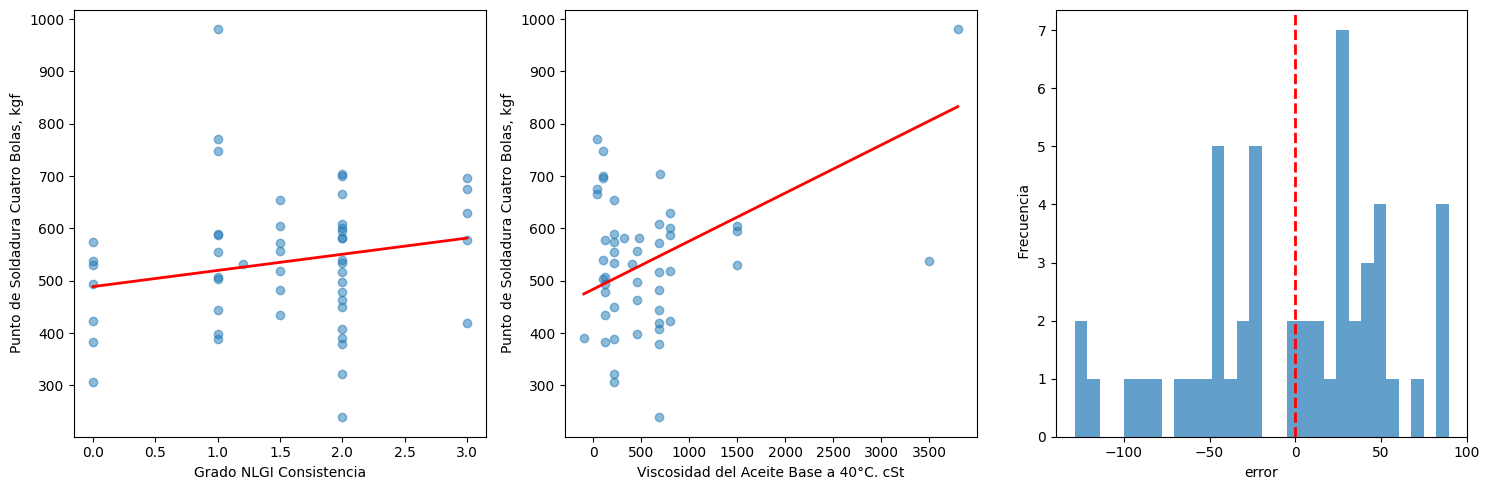

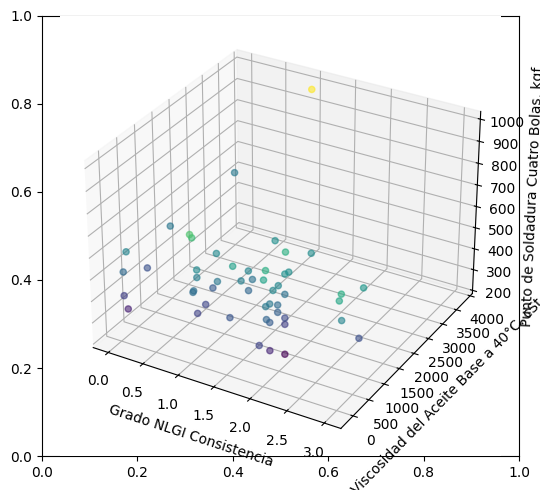

In [ ]:
# graficas
beta0_hat, beta1_hat, beta2_hat, beta3_hat, beta4_hat, beta5_hat = beta_hat
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# x1
x1_grid = np.linspace(X1.min(), X1.max(), 100)
line_x1 = (
    beta0_hat
    + beta1_hat * x1_grid
    + beta2_hat * np.mean(X2)
    + beta3_hat * np.mean(X3)
    + beta4_hat * np.mean(X4)
    + beta5_hat * np.mean(X5)
)
axes[0].scatter(X1, y, alpha=0.5, label='y experimental')
axes[0].plot(x1_grid, line_x1, 'r-', linewidth=2)
axes[0].set_xlabel('Grado NLGI Consistencia')
axes[0].set_ylabel('Punto de Soldadura Cuatro Bolas, kgf')

# x2
x2_grid = np.linspace(X2.min(), X2.max(), 100)
line_x2 = (
    beta0_hat
    + beta1_hat * np.mean(X1)
    + beta2_hat * x2_grid
    + beta3_hat * np.mean(X3)
    + beta4_hat * np.mean(X4)
    + beta5_hat * np.mean(X5)
)
axes[1].scatter(X2, y, alpha=0.5, label='y experimental')
axes[1].plot(x2_grid, line_x2, 'r-', linewidth=2)
axes[1].set_xlabel('Viscosidad del Aceite Base a 40°C. cSt')
axes[1].set_ylabel('Punto de Soldadura Cuatro Bolas, kgf')

# error
axes[2].hist(epsilon, bins=30, alpha=0.7)
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('error')
axes[2].set_ylabel(' Frecuencia')
plt.tight_layout()
plt.show()
fig.clf()

# graficar las dos variables juntas
from mpl_toolkits.mplot3d import Axes3D
fig, axes = plt.subplots(1, 1, figsize=(5.5, 5))
ax_3d = fig.add_subplot(1, 1, 1, projection='3d')
subset = np.arange(len(y))  # usamos todos los puntos
scatter = ax_3d.scatter(X1[subset], X2[subset], y[subset],
                        c=y[subset], cmap='viridis', alpha=0.6)
ax_3d.set_xlabel('Grado NLGI Consistencia')
ax_3d.set_ylabel('Viscosidad del Aceite Base a 40°C. cSt')
ax_3d.set_zlabel('Punto de Soldadura Cuatro Bolas, kgf')
plt.tight_layout()
plt.show()

## 7. F-estadistica de RLM

Ejercicios:
- Complete las siguientes "leads" de código
- Adapte el codigo para dar solucion al reto Interlub

In [12]:
# aqui se empieza el código

# dada la matriz X de la seccion anterior
# construimos primero la matriz sombrero H y la matriz M = I - H
H = X_final @ X_transpose_X_inv @ X_final.T       # X (X'X)^(-1) X'
I = np.eye(n)
M = I - H  
# muestre que I - X(X'X)-1 X' es idempotente
# muestre que I - X(X'X)-1 X' es idempotente
result = np.allclose(M @ M, M, atol=1e-8)
print("M es idempotente (M^2 = M)?", result)

# encuentre el rango I - X(X'X)-1 X'
# [Sugerencia: rango = np.linalg.matrix_rank()]
rango_M = np.linalg.matrix_rank(M)
print("Rango de M = I - H:", rango_M)

# muestre que X(X'X)-1 X' es idempotente
result = np.allclose(H @ H, H, atol=1e-8)
print("H es idempotente (H^2 = H)?", result)

# encuentre el rango de X(X'X)-1 X'
# [Sugerencia: rango = np.linalg.matrix_rank()]
rango_H = np.linalg.matrix_rank(H)
print("Rango de H = X(X'X)-1 X':", rango_H)

# muestre que (I - X(X'X)-1 X')*(X(X'X)-1 X) = 0
# cuales son las consecuencias de esto
ortogonalidad = np.allclose(M @ H, np.zeros_like(H), atol=1e-8)
print("(I - H)H = 0 (subespacios ortogonales)?", ortogonalidad)

# ahora usando la y vector de la seccion anterior
# y las betas y sus estimadores
# encuentre la estadística lambda (resultado del Lemma de Neyman-Pearson)

# residuos bajo H0: y ~ N(X * true_beta, sigma^2 I)
residuos_H0 = y - X_final @ true_beta
SSE_H0 = residuos_H0.T @ residuos_H0

# residuos bajo el modelo ajustado (H1): y ~ N(X * beta_hat, sigma^2 I)
residuos_H1 = y - X_final @ beta_hat
SSE_H1 = residuos_H1.T @ residuos_H1

lambda_stat = SSE_H0 / SSE_H1
print("\nEstadística lambda de Neyman-Pearson (SSE_H0 / SSE_H1):", float(lambda_stat))


M es idempotente (M^2 = M)? True
Rango de M = I - H: 46
H es idempotente (H^2 = H)? True
Rango de H = X(X'X)-1 X': 6
(I - H)H = 0 (subespacios ortogonales)? True

Estadística lambda de Neyman-Pearson (SSE_H0 / SSE_H1): 1.0230526251685255


## 8. Investigacion mas alla del Notebook

Ejercicios:
- Aumente la forma en que puede caracterizar los resultados de RLM
- Que otras metricas podrian ser utiles? Incluyalas!
- Busque otros modelos que puedan superar al RLM
- Use su imaginacion para hacer la solucion de reto mejor

In [13]:
# Metricas adicionales
# R^2 OG
R2 = 1 - SSE / Syy

# R^2 ajustado
R2_adj = 1 - (SSE / (n - p)) / (Syy / (n - 1))

print(f"\nR^2: {R2:.4f}")
print(f"R^2 ajustado: {R2_adj:.4f}")


R^2: 0.8192
R^2 ajustado: 0.7991


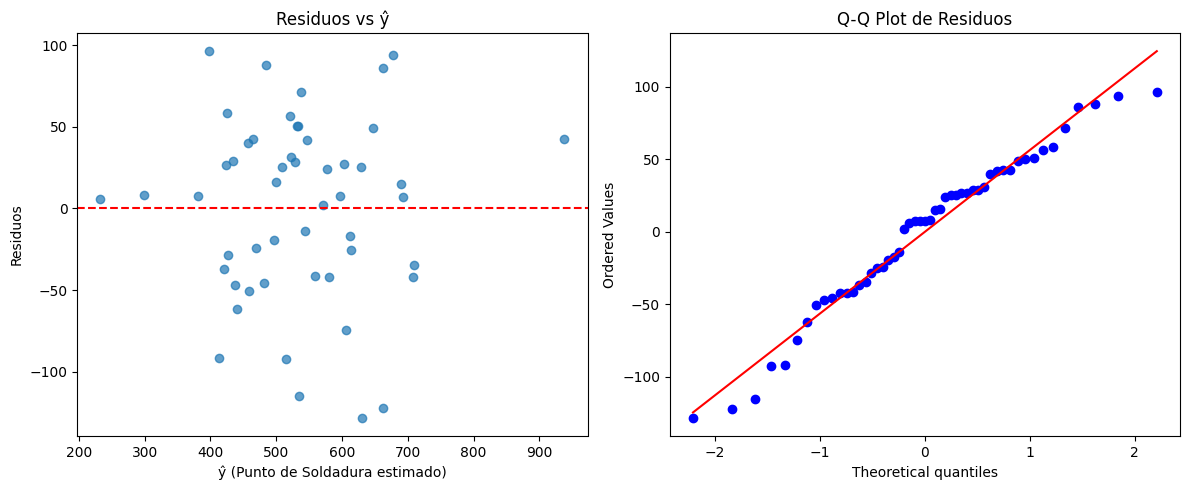

In [14]:
# Graficos de diagnostico de residuos
residuos = y - y_hat
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuos vs y_hat
axes[0].scatter(y_hat, residuos, alpha=0.7)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel('ŷ (Punto de Soldadura estimado)')
axes[0].set_ylabel('Residuos')
axes[0].set_title('Residuos vs ŷ')

# Q-Q plot de residuos
from scipy import stats
stats.probplot(residuos, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Residuos')

plt.tight_layout()
plt.show()

### Interpretaciones

##### Residuos ŷ
El gráfico de residuos vs ŷ no muestra patrones sistemáticos ni curvaturas, lo cual respalda la suposición de linealidad del modelo. La variabilidad creciente con valores altos es esperable en el contexto experimental y no afecta la validez general del ajuste.

##### Q-Q Plot
El Q–Q plot muestra una aproximación muy razonable a la normalidad. Salvo pequeñas desviaciones en los extremos, los residuos siguen bien la distribución teórica, por lo que la suposición de normalidad residual se cumple adecuadamente.


In [15]:
# Otros modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Matriz de características
X_model = np.column_stack([X1, X2, X3, X4, X5])  # Sin intercepto para sklearn

X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.25, random_state=42
)

# Modelo 1: RLM clásico (sklearn)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Modelo 2: Ridge (regularización L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Modelo 3: Random Forest
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Función para calcular y mostrar métricas
def resumen_modelo(nombre, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{nombre}: R² = {r2:.3f}, RMSE = {rmse:.2f} kgf")

print("\nDesempeño en conjunto de prueba:")
resumen_modelo("RLM (OLS)", y_test, y_pred_lin)
resumen_modelo("Ridge", y_test, y_pred_ridge)
resumen_modelo("Random Forest", y_test, y_pred_rf)


Desempeño en conjunto de prueba:
RLM (OLS): R² = 0.775, RMSE = 63.56 kgf
Ridge: R² = 0.779, RMSE = 63.04 kgf
Random Forest: R² = 0.340, RMSE = 108.89 kgf


### Interpretación del desempeño entre modelos.
Los resultados muestran que el modelo de Regresión Lineal Ordinaria (OLS) es el más adecuado para este conjunto de datos. OLS alcanza un R² de 0.775 y un RMSE cercano a 63 kgf, lo cual es coherente con la variabilidad típica de la prueba de Punto de Soldadura Cuatro Bolas y con el nivel de ruido incluido en la simulación (σ ≈ 50).

El modelo Ridge presenta una ligera mejora respecto a OLS (R² = 0.779), lo que indica la presencia de una colinealidad moderada entre las variables explicativas. Sin embargo, esta mejora es marginal, por lo que la estructura subyacente sigue siendo fundamentalmente lineal y no requiere una regularización fuerte.

En contraste, el modelo Random Forest obtiene un desempeño significativamente inferior (R² ≈ 0.34). Esto se debe principalmente a (1) el tamaño reducido del dataset, (2) el alto nivel de ruido inherente a la simulación y a la prueba experimental, y (3) la forma lineal explícita en que fueron generados los datos. En este escenario, los modelos basados en árboles tienden a sobreajustarse, perdiendo capacidad de generalización.

En conjunto, los resultados indican que el modelo lineal es el que mejor representa el comportamiento del proceso en este caso, tanto por su precisión predictiva como por su interpretabilidad, lo cual es especialmente valioso en un entorno industrial como el planteado en el reto Interlub.
